In [23]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import glob
save = False
plt.rcParams.update({"text.usetex": True,'font.family': 'serif','font.size':10})

In [65]:
# Parameters
numslices = 10
N = 128
srcplane = 63
boxsize = 4.537 # kpc
dr = boxsize / N

In [25]:
# Load Files
files_coarse = sorted(glob.glob("./results_coarse/xfrac*.pkl"))
print(files_coarse)

['./results_coarse/xfrac_0.000.pkl', './results_coarse/xfrac_1.000.pkl', './results_coarse/xfrac_10.000.pkl', './results_coarse/xfrac_2.000.pkl', './results_coarse/xfrac_3.000.pkl', './results_coarse/xfrac_4.000.pkl', './results_coarse/xfrac_5.000.pkl', './results_coarse/xfrac_6.000.pkl', './results_coarse/xfrac_7.000.pkl', './results_coarse/xfrac_8.000.pkl', './results_coarse/xfrac_9.000.pkl']


In [45]:
slices_coarse = np.empty((len(files_coarse),srcplane+2))
for i,fn in enumerate(files_coarse):
    with open(fn,"rb") as f:
        slices_coarse[i] = pkl.load(f)[srcplane:,srcplane,srcplane]

In [46]:
with open(files_coarse[-1],"rb") as f:
    xtest = pkl.load(f)

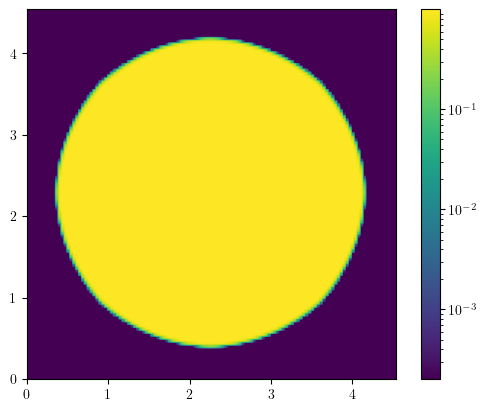

In [47]:
plt.imshow(xtest[:,:,srcplane],norm='log',extent=(0,4.537,0,4.537))
plt.colorbar()

In [57]:
slices_coarse

array([[2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
        2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.000000

In [48]:
slices_fine = np.flip(slices_fine,axis=0)

NameError: name 'slices_fine' is not defined

In [66]:
# Analytical Solution
kpc = 3.086e21
year = 3.15576E+07
Ngamma = 1e54
nH = 1.87e-4
alpha_B = 2.59e-13

kpc_in_km = 3.0857e16 # km
myr_in_s = 31557600000000 # s

r_S = ((3*Ngamma)/(4*np.pi*alpha_B*nH**2))**(1./3) / kpc
t_rec = 1.0 / (alpha_B*nH*year*1e6)
print("r_S = ",r_S," kpc")
print("t_rec = ",t_rec," Myr")
def r_I(t):
    return r_S * (1.0 - np.exp(-t/t_rec))**(1./3)
def v_I(t):
    return kpc_in_km/myr_in_s * r_S/(3*t_rec) * (np.exp(-t/t_rec))/(1.0 - np.exp(-t/t_rec))**(2./3)

r_S =  964.3770859478684  kpc
t_rec =  654.2664673678886  Myr


In [67]:
tt = np.linspace(0,500,200,endpoint=True)
tt_ = np.linspace(0,500,11,endpoint=True)
tt_fine = np.linspace(0,500,101,endpoint=True)
r_analytical = r_I(tt)
v_analytical = v_I(tt[1:])

In [68]:
x = np.linspace(0,boxsize/2,65)

In [69]:
# Find position of ionization front by interpolation
# flip() is used because np.interp works on monotonically increasing functions only
front_pos_coarse = np.empty(11)
front_pos_fine = np.empty(101)
for k in range(11):
    front_pos_coarse[k] = np.interp(0.5,np.flip(slices_coarse[k]),np.flip(x))
for k in range(101):
    front_pos_fine[k] = np.interp(0.5,np.flip(slices_fine[k]),np.flip(x))

NameError: name 'slices_fine' is not defined

In [70]:
front_pos_coarse

array([0.        , 1.15531674, 1.87922192, 1.46579641, 1.62039485,
       1.71818206, 1.78312106, 1.82213091, 1.84833048, 1.86010042,
       1.86753433])

In [53]:
np.interp(0.5,np.flip(slices_fine[-1]),np.flip(x))

NameError: name 'slices_fine' is not defined

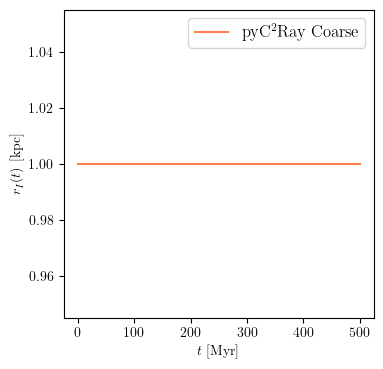

In [56]:
fig3, ax3 = plt.subplots(figsize=(4,4))
offset = 7
#ax3.plot(tt,r_analytical,color='black',label="Analytical")
#ax3.plot(tt_,front_pos + offset,'o',label="pyc2ray (+ constant offset)",color='orangered')
ax3.plot(tt_,front_pos_coarse,'-',ms=5,label="pyC$^2$Ray Coarse",color='coral')
#ax3.plot(tt_fine,front_pos_fine,'--',ms=5,label="pyC$^2$Ray Fine",color='cadetblue')
ax3.set_xlabel("$t$ [Myr]")
ax3.set_ylabel("$r_I(t)$ [kpc]")
ax3.legend(fontsize=12)
if save: fig3.savefig("time_plot.png",dpi=300,bbox_inches='tight')

In [14]:
# convert to km/s

#front_vel_coarse = kpc_in_km/myr_in_s * np.diff(front_pos_coarse) / np.diff(tt_)
#front_vel_fine = np.diff(front_pos_fine) / np.diff(tt_fine)
t_ave = []
t_ave_fine = []
front_vel_fine = []
front_vel_coarse = []
for k in range(1,len(tt_)):
    j = 1
    while (front_pos_coarse[k]-front_pos_coarse[k-j]) < dr:
        j+=1
    front_vel_coarse.append(kpc_in_km/myr_in_s * (front_pos_coarse[k]-front_pos_coarse[k-j]) / (tt_[k]-tt_[k-j]))
    tavei = (tt_[k]+tt_[k-j])/2
    t_ave.append(tavei)
for k in range(1,len(tt_fine)):
    j = 1
    while (front_pos_fine[k]-front_pos_fine[k-j]) < dr:
        j+=1
    front_vel_fine.append(kpc_in_km/myr_in_s * (front_pos_fine[k]-front_pos_fine[k-j]) / (tt_fine[k]-tt_fine[k-j]))
    #tavei = (tt_fine[k]+tt_fine[k-1])/2
    tavei = (tt_fine[k]+tt_fine[k-j])/2
    t_ave_fine.append(tavei)

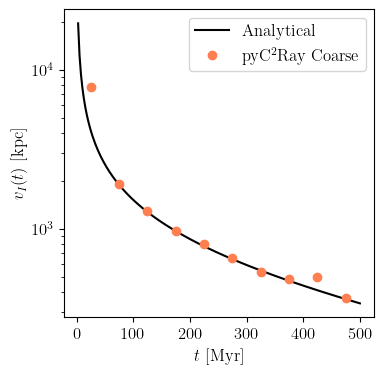

In [16]:
fig4, ax4 = plt.subplots(figsize=(4,4))
offset = 7
ax4.semilogy(tt[1:],v_analytical,color='black',label="Analytical")
ax4.semilogy(t_ave,front_vel_coarse,'o',label="pyC$^2$Ray Coarse",color='coral')
ax4.set_xlabel("$t$ [Myr]")
ax4.set_ylabel("$v_I(t)$ [kpc]")
ax4.legend()
if save: fig4.savefig("time_plot_vel.png",dpi=300,bbox_inches='tight')

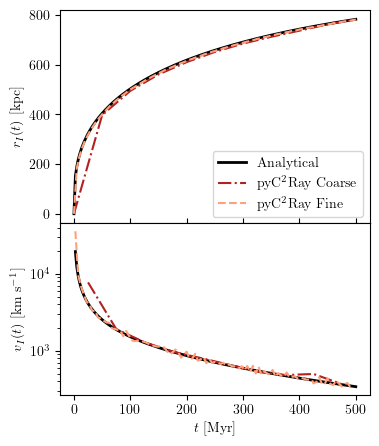

In [15]:
fig, ax = plt.subplots(2,1,figsize=(4,5),sharex=True,height_ratios=[5,4])
ax[0].plot(tt,r_analytical,color='black',label="Analytical",lw=2)
ax[0].plot(tt_,front_pos_coarse,'-.',label="pyC$^2$Ray Coarse",color='cornflowerblue')
ax[0].plot(tt_fine,front_pos_fine,'--',ms=6,label="pyC$^2$Ray Fine",color='lightsalmon')


#ax[0].set_xlabel("$t$ [Myr]")
ax[0].set_ylabel("$r_I(t)$ [kpc]")
ax[0].legend()

ax[1].semilogy(tt[1:],v_analytical,color='black',label="Analytical",lw=2)
ax[1].semilogy(t_ave,front_vel_coarse,'-.',label="pyC$^2$Ray Coarse",color='cornflowerblue')
ax[1].semilogy(t_ave_fine,front_vel_fine,'--',label="pyC$^2$Ray Fine",color='lightsalmon')

#ax[1].semilogy(tt_,front_vel_coarse,'^',label="pyC$^2$Ray Coarse",color='teal')

ax[1].set_xlabel("$t$ [Myr]")
ax[1].set_ylabel("$v_I(t)$ [km s$^{-1}$]")
ax[1].tick_params(top=True)
#ax[1].legend()
fig.subplots_adjust(hspace=0)

In [23]:
fig.savefig('test1.eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
